In [11]:
import numpy as np
import matplotlib.pyplot as plt

Converged in 102 iterations.


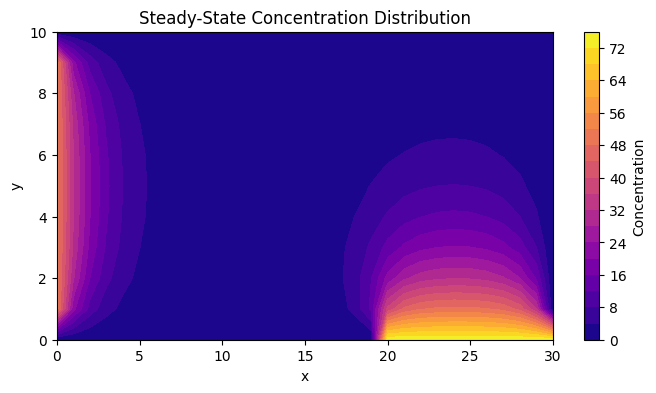

In [ ]:
# Parameters
nx, ny = 31, 11
Lx, Ly = 30, 10
dx, dy = 1.0, 1.0
D = 0.6
k = 0.1
tolerance = 1e-6
max_iter = 10000


# Initialize concentration field
c = np.zeros((ny, nx))


# Boundary conditions
c[:, 0] = 50                      # Left boundary (x=0)
c[0, 20:] = 75                    # Bottom boundary (x=20→30)
c[-1, :] = 0                      # Top boundary (y=10)
c[0, :20] = 0                     # Bottom boundary (x=0→20)


# Coefficients for iteration
rx = D / dx**2
ry = D / dy**2
A = 2 * (rx + ry) + k


# Iterative solution using Gauss-Seidel
for iteration in range(max_iter):
    c_old = c.copy()

    for j in range(1, ny - 1):           # y-direction
        for i in range(1, nx - 1):       # x-direction
            c[j, i] = (rx * (c[j, i+1] + c[j, i-1]) +
                       ry * (c[j+1, i] + c[j-1, i])) / A

    # Reapply boundary conditions
    c[:, 0] = 50
    c[0, 20:] = 75
    c[-1, :] = 0
    c[0, :20] = 0

    # Check for convergence
    error = np.max(np.abs(c - c_old))
    if error < tolerance:
        print(f"Converged in {iteration} iterations.")
        break

# Plot steady-state concentration distribution
X, Y = np.meshgrid(np.linspace(0, Lx, nx), np.linspace(0, Ly, ny))

plt.figure(figsize=(8, 4))
cp = plt.contourf(X, Y, c, 20, cmap='plasma')
plt.colorbar(cp, label='Concentration')
plt.title('Steady-State Concentration Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
for i in range(11):
    for j in range(31):
        print(X[i][j], end=" ")
    print()

0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 
0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 
0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 
0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 
0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 
0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 
0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0